In [1]:

from datetime import datetime, timedelta,date
from calendar import monthrange
from statistics import mean
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
import numpy as np
import cdsapi
import utils


In [2]:
IMGS_PATH = ('C:/Users/ricar/Downloads/CGIT/Manitoba1-1')
band_labels = ["B4", "B3", "B2", "B8"]
images = utils.load_landsat_image(IMGS_PATH, band_labels)
img_keys = list(images.keys())
#obtener initial date desde el dataextractor "POR HACER"
initial_date = date(2019,4,1)
#Mandamos a llamar a la función que nos da (diferencia de dias, las fechas de las imagenes, las horas de)
days,dates,hours = utils.images_time_info(img_keys,initial_date)
#Generamos la fecha de la primera fotografia 
start_dt =date.fromisoformat((min(dates)).strftime("%Y-%m-%d"))
#Generamos la fecha de la ultima fotografia 
end_dt= date.fromisoformat((max(dates)).strftime("%Y-%m-%d"))

#Llamamos a la función que nos genera un diccionario de las fechas de interes para datos de temperatura y precipitacion
#Donde regresa el diccionario de fechas y los valores de temp y precip
data_aa,date_dic = utils.temperature_precipitation_api(date_min=start_dt, date_max=end_dt,hours=hours)
#Este es opcional y es para dar un numpy.ndarray para los valores de temp y preci 
data_prep,data_temp=utils.values_temp_precip(dict_data=data_aa)

#Ahora generamos un diccionario con las fechas y sus valores correspondientes de temp y preci
data_as=utils.data_extrator_temp(data_tp=data_aa,date_dict_api=date_dic )

2022-11-11 11:28:48,234 INFO Welcome to the CDS
2022-11-11 11:28:48,234 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2022-11-11 11:28:48,523 INFO Request is completed
2022-11-11 11:28:48,524 INFO Downloading https://download-0021.copernicus-climate.eu/cache-compute-0021/cache/data6/adaptor.mars.internal-1668181281.7001216-28115-9-18dd7e58-ec3b-4556-8a2a-749051ae44e7.nc to download.nc (4.6K)
2022-11-11 11:28:49,548 INFO Download rate 4.5K/s


In [3]:
data_precipitation, data_temperature= utils.values_temp_precip(dict_data=data_aa)

In [5]:
data_temperature=data_temperature.reshape(-1,)
data_precipitation=data_precipitation.reshape(-1,)

In [6]:
type(data_temperature)

numpy.ndarray

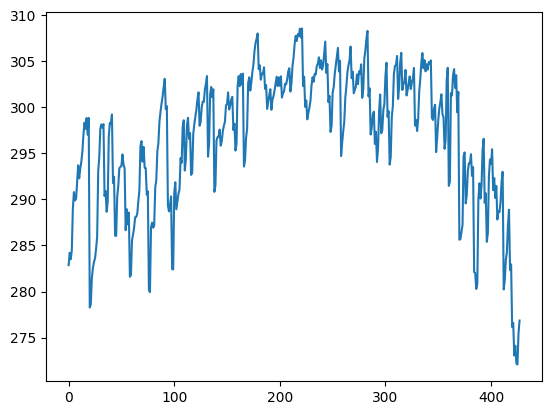

In [7]:
plt.plot(data_temperature)

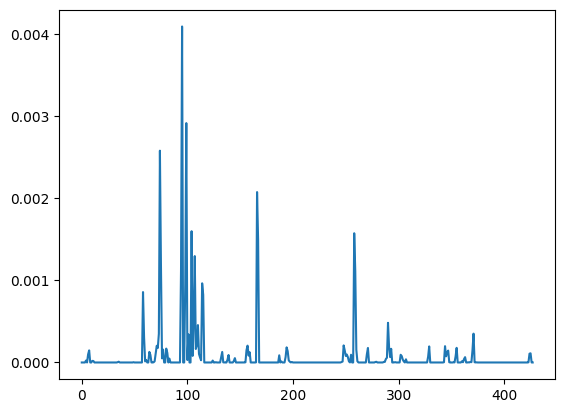

In [8]:
plt.plot(data_precipitation)

In [ ]:
#valor temperatura
#data_temp
#Valor precipitacion
#data_prep


In [ ]:
IMGS_PATH = ('C:/Users/ricar/Downloads/CGIT/Manitoba1-1')
band_labels = ["B4", "B3", "B2", "B8"]
images = utils.load_landsat_image(IMGS_PATH, band_labels)
img_keys = list(images.keys())

In [ ]:
year=2019

In [ ]:
initial_datea= date(year,4,1)
initial_date

In [67]:
import cdsapi

c = cdsapi.Client()

c.retrieve(
    'projections-cmip6',
    {
        'format': 'zip',
        'model': 'gfdl_esm4',
        'experiment': 'ssp3_7_0',
        'temporal_resolution': 'daily',
        'variable': 'near_surface_air_temperature',
        'year': [
            '2022', '2023','2024',
        ],
        'month': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
        ],
        'day': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
            '13', '14', '15',
            '16', '17', '18',
            '19', '20', '21',
            '22', '23', '24',
            '25', '26', '27',
            '28', '29', '30',
            '31',
        ],
        'area': [
            90, -180, -90,
            180,
        ],
    },
    'download.zip')

2022-11-11 12:48:26,476 INFO Welcome to the CDS
2022-11-11 12:48:26,481 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/projections-cmip6
2022-11-11 12:48:26,869 INFO Request is queued
2022-11-11 12:48:28,096 INFO Request is running
2022-11-11 12:49:18,066 INFO Request is completed
2022-11-11 12:49:18,068 INFO Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data3/adaptor.esgf_wps.retrieve-1668192532.9664793-18108-15-04693e3f-afd6-4d32-b6ae-b072d9033f61.zip to download.zip (124.2M)
2022-11-11 12:49:30,182 INFO Download rate 10.3M/s 


Result(content_length=130248673,content_type=application/zip,location=https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data3/adaptor.esgf_wps.retrieve-1668192532.9664793-18108-15-04693e3f-afd6-4d32-b6ae-b072d9033f61.zip)

In [51]:
data_tee=xr.open_dataset('dataglobal.nc')

In [52]:
#Asigna los valores de lat y lon que tiene la api
lat_global=np.array(data_tee.lat)
lon_global=np.array(data_tee.lon)

In [54]:
lon_global

array([-179.375, -178.125, -176.875, -175.625, -174.375, -173.125,
       -171.875, -170.625, -169.375, -168.125, -166.875, -165.625,
       -164.375, -163.125, -161.875, -160.625, -159.375, -158.125,
       -156.875, -155.625, -154.375, -153.125, -151.875, -150.625,
       -149.375, -148.125, -146.875, -145.625, -144.375, -143.125,
       -141.875, -140.625, -139.375, -138.125, -136.875, -135.625,
       -134.375, -133.125, -131.875, -130.625, -129.375, -128.125,
       -126.875, -125.625, -124.375, -123.125, -121.875, -120.625,
       -119.375, -118.125, -116.875, -115.625, -114.375, -113.125,
       -111.875, -110.625, -109.375, -108.125, -106.875, -105.625,
       -104.375, -103.125, -101.875, -100.625,  -99.375,  -98.125,
        -96.875,  -95.625,  -94.375,  -93.125,  -91.875,  -90.625,
        -89.375,  -88.125,  -86.875,  -85.625,  -84.375,  -83.125,
        -81.875,  -80.625,  -79.375,  -78.125,  -76.875,  -75.625,
        -74.375,  -73.125,  -71.875,  -70.625,  -69.375,  -68.

In [55]:
#Definimos nuestros valores
lat=38.153600901211824
lon=-97.73950118113329

In [56]:
#Buscamos el valor con la menor diferencia (el mas parecido)
diflat=(np.absolute(lat_global-lat))
diflon=(np.absolute(lon_global-lon))

In [57]:
#Guardamos la locacion del valor mas parecido que hay en la api
location_lat = diflat.argmin()
location_lon = diflon.argmin()

In [58]:
#Comprobamos
lat_global[location_lat]

38.5

In [59]:
#Obtenemos los valores de temp mas cercanos a la locación
data_tee.tas.isel(lat=location_lat,lon=location_lon)

<xarray.DataArray 'tas' (time: 730)>
array([278.37555, 276.37888, 275.02487, ..., 279.95697, 277.1125 , 280.21762],
      dtype=float32)
Coordinates:
    height   float64 ...
    lat      float64 38.5
    lon      float64 -98.12
  * time     (time) object 2022-01-01 12:00:00 ... 2023-12-31 12:00:00
Attributes:
    long_name:      Near-Surface Air Temperature
    units:          K
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    standard_name:  air_temperature
    interp_method:  conserve_order2
    original_name:  tas

In [60]:
future=data_tee.tas.isel(lat=location_lat,lon=location_lon)

In [61]:
#Separamos los valores por año
x_2022=np.array(future[0:365])
x_2023=np.array(future[365:])

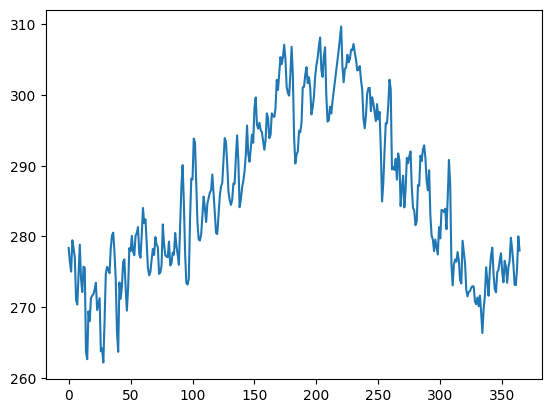

In [62]:
plt.plot(x_2022.reshape(-1,))

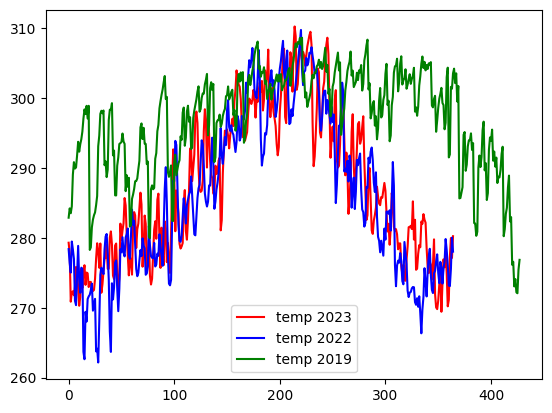

In [63]:
plt.figure()
plt.plot(x_2023.reshape(-1,),'r',label="temp 2023")
plt.plot(x_2022.reshape(-1,),'b',label="temp 2022")
plt.plot(data_temperature,'g',label="temp 2019")
plt.legend()
plt.show()